## Этапы анализа данных
    1. Первичная обработка данных.
    2. Определение распределения признака для числовых переменных, устранение выбросов.
    3. Оценка количества уникальных значений для номинативных переменных.
    4. При необходимости преобразование и конвертация данных.
    5. Проведение корреляционного анализа количественных переменных.
    6. Определение не коррелирующих переменных.
    7. Анализ номинативных переменных и устранение тех, которые не влияют на предсказываемую величину.
    8. Формулировака выводов относительно качества данных и тех переменных, которые будут использоваться в дальнейшем при построении модели.

## Описание столбцов

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 studytime, granular — время на учёбу в часах видимо

16 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

17 schoolsup — дополнительная образовательная поддержка (yes или no)

18 famsup — семейная образовательная поддержка (yes или no)

19 paid — дополнительные платные занятия по математике (yes или no)

20 activities — дополнительные внеучебные занятия (yes или no)

21 nursery — посещал детский сад (yes или no)

22 higher — хочет получить высшее образование (yes или no)

23 internet — наличие интернета дома (yes или no)

24 romantic — в романтических отношениях (yes или no)

25 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

26 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

27 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

28 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

29 absences — количество пропущенных занятий

30 score — баллы по госэкзамену по математике

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import analyze_data
from itertools import combinations
from scipy.stats import ttest_ind
   
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

db = pd.read_csv('C:\\Users\\prosa\\source\\repos\\skillfactory_rds\\project 2\\stud_math.xls')

def get_boxplot(yColumn, column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y=yColumn, data=db, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

def get_stat_dif(yColumn, column):
    cols = db.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        x = db.loc[db.loc[:, column] == comb[0], yColumn]
        y = db.loc[db.loc[:, column] == comb[1], yColumn]
        stat = ttest_ind(x, y)
        if stat.pvalue <= 0.05/len(combinations_all):            
            return True
    return False   
        
def get_stat_dif_of(yColumn, columns):
    find = False
    for c in columns:        
        if get_stat_dif(yColumn, c):
            find |= True
            print('Найдены статистически значимые различия для колонки', c)
    if find == False:
        print('Статистически значимые различия НЕ найдены для колонок')

display(db.head(10))
db.info()

db.rename(columns={ db.columns[20]: "studytime_granular" }, inplace = True)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school
GP,349
MS,46


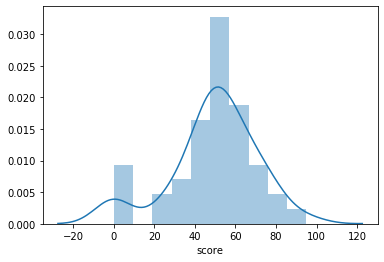

In [88]:
# Анализ столбцов

# school
display(pd.DataFrame(db.school.value_counts()))

score_ms_school=db[db.school == 'MS']['score']
sns.distplot(score_ms_school, bins=10);

Делаем вывод, что ученики 'MS' школы набирают не очень большие баллы. К тому же выборка у них значительно меньше.

In [89]:
# sex
display(pd.DataFrame(db.sex.value_counts()))

,sex
F,208
M,187


,16,17,18,15,19,20,22,21
age,104,98,82,82,24,3,1,1


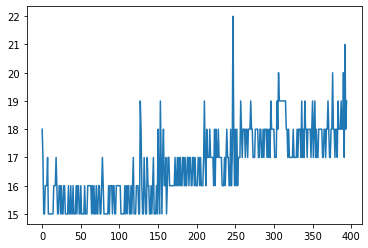


25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


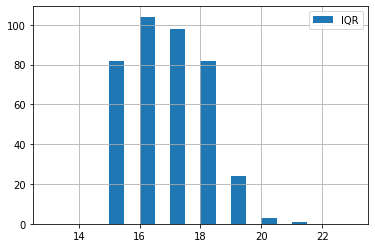

In [140]:
# age
display(pd.DataFrame(db.age.value_counts()).transpose())
plt.figure()
plt.plot(db.age)
plt.show()

median = db.age.median()
perc25 = db.age.quantile(0.25)
perc75 = db.age.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
db.age.loc[ft].hist(bins=20, range=(13, 23), label='IQR')
db = db.loc[ft]
plt.legend();

In [141]:
Судя по границе выбросов, выбросов у нас по данному полю нет.

SyntaxError: invalid syntax (<ipython-input-141-b71d3a7c2f17>, line 1)

,U,R
address,294,83


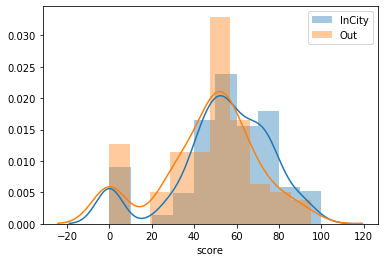

,GT3,LE3
famsize,260,107


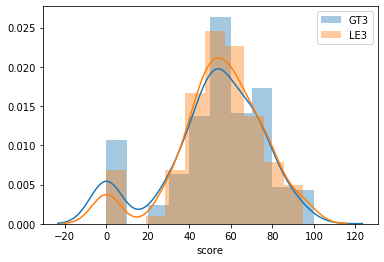

,T,A
Pstatus,313,36


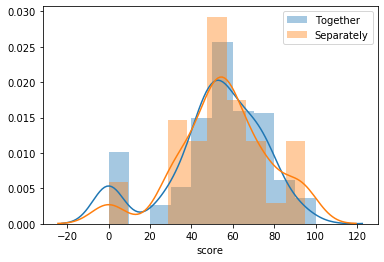

In [142]:
# address
display(pd.DataFrame(db.address.value_counts()).transpose())

plt.figure();
sns.distplot(db[db.address == 'U']['score'], bins=10, label='InCity');
sns.distplot(db[db.address == 'R']['score'], bins=10, label='Out');
plt.legend();
plt.show();

# famsize
display(pd.DataFrame(db.famsize.value_counts()).transpose())

plt.figure();
sns.distplot(db[db.famsize == 'GT3']['score'], bins=10, label='GT3');
sns.distplot(db[db.famsize == 'LE3']['score'], bins=10, label='LE3');
plt.legend();
plt.show();

# Pstatus
display(pd.DataFrame(db.Pstatus.value_counts()).transpose())

plt.figure();
sns.distplot(db[db.Pstatus == 'T']['score'], bins=10, label='Together');
sns.distplot(db[db.Pstatus == 'A']['score'], bins=10, label='Separately');
plt.legend();
plt.show();

Судя по 3-ём графикам распределения результатов теста, можно сделать вывод, что размер семьи (famsize) скорее всего не сильно влияет на оценку, так как значения данного категорийного признака распределенны примерно одинаково, чего нельзя сказать про address и Pstatus. Так как видно, что кол-во хороших оценок больше у тех кто живёт в городе. А по признаку полноценной семьи, вообще можно заметить, что кол-во тех у кого балл больше 90 воспитывались не в полноценной семье. Соответственно есть некая зависимость и влияние на оценку.

,4.0,2.0,3.0,1.0,0.0
Medu,131,102,96,59,3


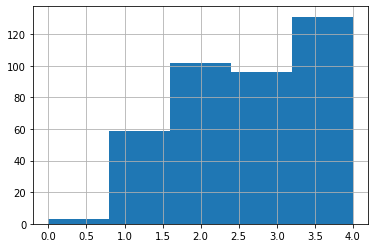

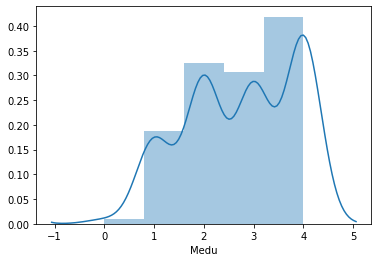

In [143]:
# Medu
display(pd.DataFrame(db.Medu.value_counts()).transpose())
db.Medu.hist(bins=5)
db.Medu.describe()
plt.figure();

sns.distplot(db.Medu, bins=5);


25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


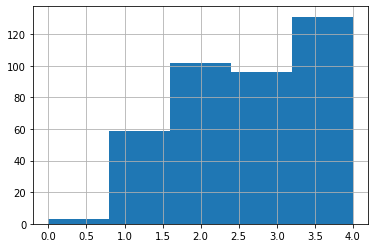

In [144]:
median = db.Medu.median()
perc25 = db.Medu.quantile(0.25)
perc75 = db.Medu.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.Medu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
db.Medu.loc[ft].hist(bins=5, range=(0, 4), label='IQR')
db = db.loc[ft]

Судя по границам выбросов, нулевые значения можно оставить.

,2.0,3.0,4.0,1.0,0.0,40.0
Fedu,105,95,88,76,2,1



25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


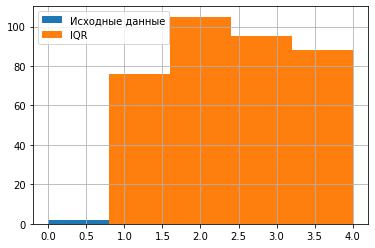

In [145]:
# Fedu
display(pd.DataFrame(db.Fedu.value_counts()).transpose())

median = db.Fedu.median()
perc25 = db.Fedu.quantile(0.25)
perc75 = db.Fedu.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
db.Fedu.hist(bins=5, range=(0, 4), label='Исходные данные')
db.Fedu.loc[ft].hist(bins=5, range=(0, 4), label='IQR')
plt.legend();

Замечаем что присутствует, скорее всего, ошибочное значение 40, так же видим, что значение 0 попадает под критерий выброса.   Соответственно фильтруем эти данные.

count    364.000000
mean       2.535714
std        1.073774
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

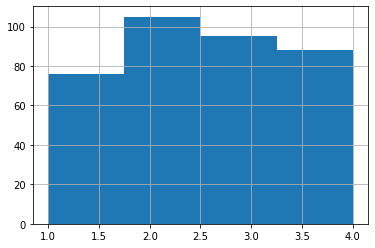

In [146]:
db = db.loc[db.Fedu <= 4]
db = db.loc[ft]
db.Fedu.hist(bins=4)
db.Fedu.describe()

,other,services,at_home,teacher,health
Mjob,122,88,57,47,31


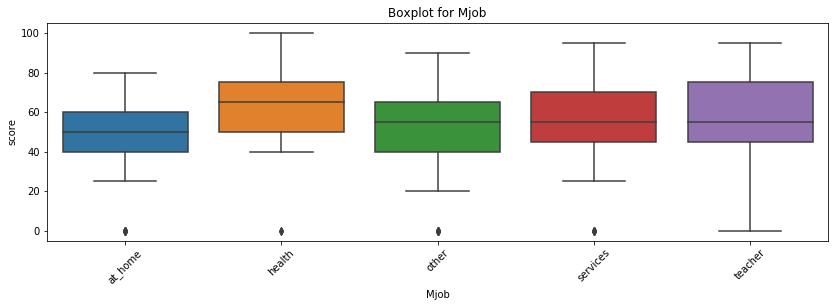

In [147]:
# Mjob
display(pd.DataFrame(db.Mjob.value_counts()).transpose())
get_boxplot('score','Mjob')

,other,services,teacher,at_home,health
Fjob,186,91,26,14,13


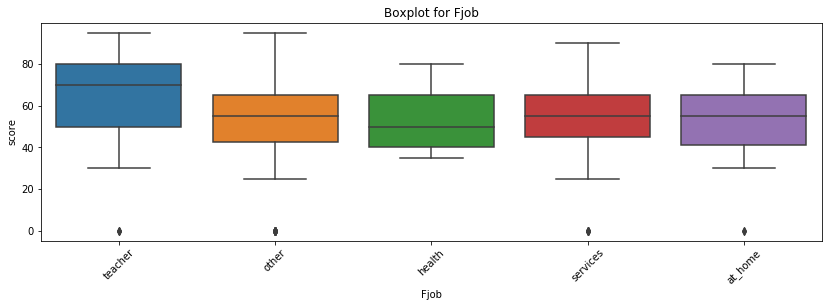

In [148]:
# Fjob
display(pd.DataFrame(db.Fjob.value_counts()).transpose())
get_boxplot('score','Fjob')

,course,home,reputation,other
reason,127,95,95,31


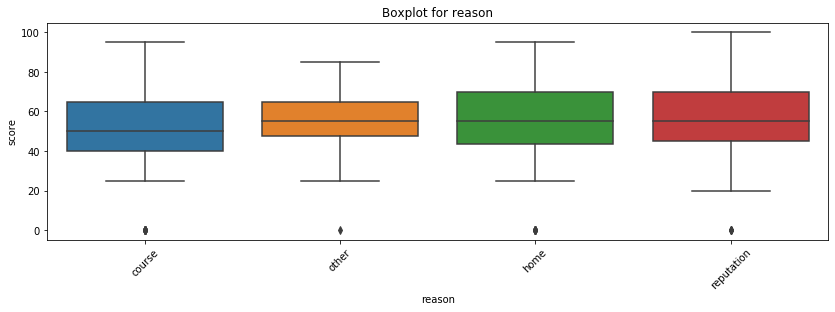

In [149]:
# reason
display(pd.DataFrame(db.reason.value_counts()).transpose())
get_boxplot('score','reason')

,mother,father,other
guardian,232,76,26


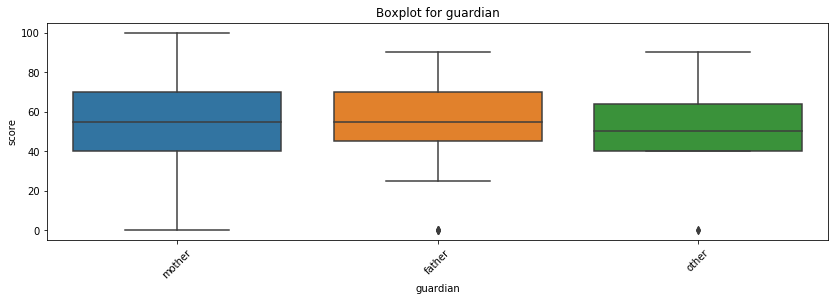

In [150]:
# guardian
display(pd.DataFrame(db.guardian.value_counts()).transpose())
get_boxplot('score','guardian')

,1.0,2.0,3.0,4.0
traveltime,221,90,21,7


count    339.000000
mean       1.451327
std        0.704900
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

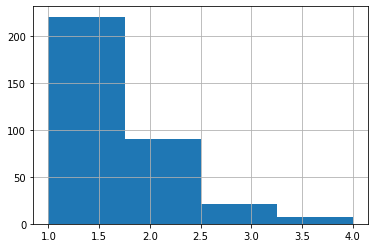

In [151]:
# traveltime
display(pd.DataFrame(db.traveltime.value_counts()).transpose())
db.traveltime.hist(bins=4)
db.traveltime.describe()

,2.0,1.0,3.0,4.0
studytime,179,96,58,24


count    357.000000
mean       2.028011
std        0.837532
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

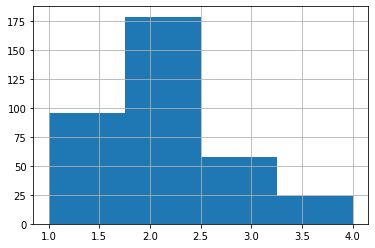

In [152]:
# studytime
display(pd.DataFrame(db.studytime.value_counts()).transpose())
db.studytime.hist(bins=4)
db.studytime.describe()

,-6.0,-3.0,-9.0,-12.0
studytime_granular,179,96,58,24


count    357.000000
mean      -6.084034
std        2.512597
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

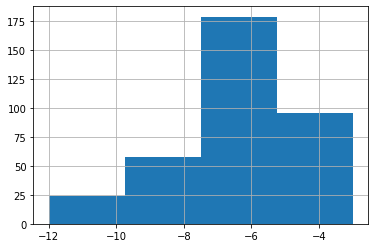

In [153]:
# studytime_granular
display(pd.DataFrame(db.studytime_granular.value_counts()).transpose())
db.studytime_granular.hist(bins=4)
db.studytime_granular.describe()

,0.0,1.0,2.0,3.0
failures,274,44,14,14


count    346.000000
mean       0.329480
std        0.739054
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

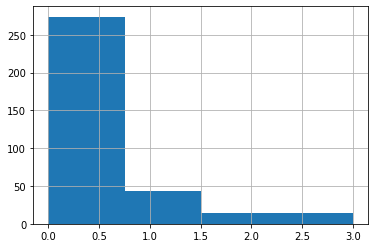

In [154]:
# failures
display(pd.DataFrame(db.failures.value_counts()).transpose())
db.failures.hist(bins=4)
db.failures.describe()

In [155]:
# schoolsup
display(pd.DataFrame(db.schoolsup.value_counts()).transpose())

# famsup
display(pd.DataFrame(db.famsup.value_counts()).transpose())

# paid
display(pd.DataFrame(db.paid.value_counts()).transpose())

# activities
display(pd.DataFrame(db.activities.value_counts()).transpose())

# nursery
display(pd.DataFrame(db.nursery.value_counts()).transpose())

# higher
display(pd.DataFrame(db.higher.value_counts()).transpose())

# internet
display(pd.DataFrame(db.internet.value_counts()).transpose())

# romantic
display(pd.DataFrame(db.romantic.value_counts()).transpose())

,no,yes
schoolsup,309,46


,yes,no
famsup,201,128


,no,yes
paid,183,144


,yes,no
activities,177,173


,yes,no
nursery,274,74


,yes,no
higher,331,17


,yes,no
internet,279,53


,no,yes
romantic,223,114


,4.0,5.0,3.0,2.0,1.0,-1.0
famrel,166,93,57,16,7,1


count    340.000000
mean       3.935294
std        0.941624
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

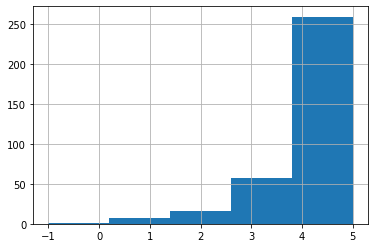

In [156]:
# famrel
display(pd.DataFrame(db.famrel.value_counts()).transpose())
db.famrel.hist(bins=5)
db.famrel.describe()

Замечаем одно несоответствующее значение (-1). Исключим его из выборки.

count    339.000000
mean       3.949853
std        0.903883
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

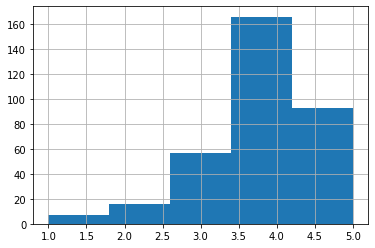

In [157]:
db = db.loc[db.famrel > 0]
db.famrel.hist(bins=5)
db.famrel.describe()

,3.0,4.0,2.0,5.0,1.0
freetime,131,95,54,33,17


count    330.000000
mean       3.221212
std        1.005836
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

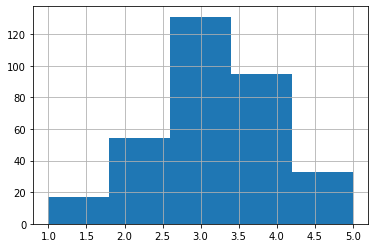

In [158]:
# freetime
display(pd.DataFrame(db.freetime.value_counts()).transpose())
db.freetime.hist(bins=5)
db.freetime.describe()

,3.0,2.0,4.0,5.0,1.0
goout,114,85,70,44,19


count    332.000000
mean       3.105422
std        1.103839
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

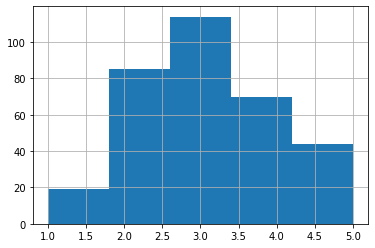

In [159]:
# goout
display(pd.DataFrame(db.goout.value_counts()).transpose())
db.goout.hist(bins=5)
db.goout.describe()

,5.0,3.0,4.0,1.0,2.0
health,110,80,58,40,38


count    326.000000
mean       3.490798
std        1.378374
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

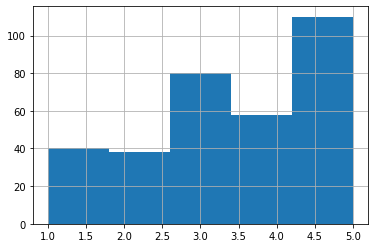

In [160]:
# health
display(pd.DataFrame(db.health.value_counts()).transpose())
db.health.hist(bins=5)
db.health.describe()

In [161]:
# absences
display(pd.DataFrame(db.absences.value_counts()).transpose())
db.absences.describe()

,0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,3.0,16.0,7.0,18.0,5.0,20.0,22.0,15.0,1.0,9.0,25.0,54.0,385.0,26.0,56.0,24.0,212.0,13.0,21.0,38.0,40.0,23.0,11.0,17.0,28.0
absences,94,53,46,27,19,14,11,9,8,6,5,4,4,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


count    327.000000
mean       7.333333
std       24.971681
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Замечаем много выбросов в сторону увеличения значений, начиная с 20. Отфильтруем данные.


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


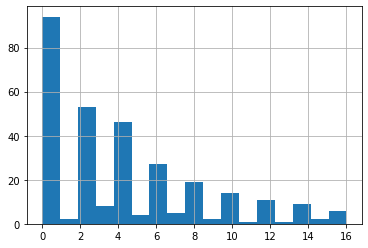

count    312.000000
mean       4.487179
std        4.826224
min        0.000000
25%        0.000000
50%        3.000000
75%        6.250000
max       20.000000
Name: absences, dtype: float64

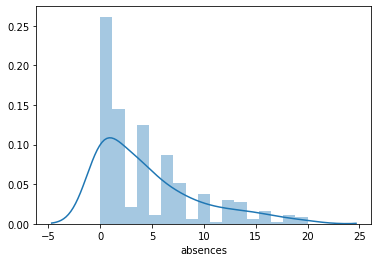

In [162]:
median = db.absences.median()
perc25 = db.absences.quantile(0.25)
perc75 = db.absences.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
plt.figure();
db.absences.loc[ft].hist(bins=17, range=(0, 16), label='IQR')
plt.show();

db = db.loc[ft]
sns.distplot(db.absences, bins=17);

db.absences.describe()

По графикам видно, что нечётное количество прогулов распределенно в меньшем количестве, чем чётное. Странная закономерность, но всё же. 



25-й перцентиль: 0.0, 75-й перцентиль: 6.25, IQR: 6.25,  Границы выбросов: [-9.375, 15.625].


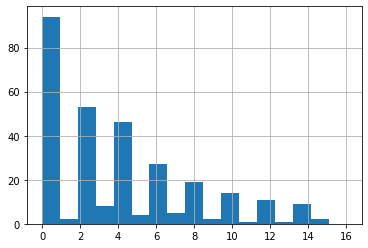

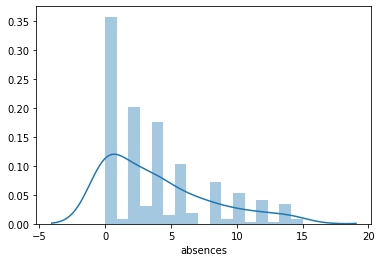

In [163]:
median = db.absences.median()
perc25 = db.absences.quantile(0.25)
perc75 = db.absences.quantile(0.75)
IQR = perc75 - perc25

print('\n25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

ft = db.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
plt.figure();
db.absences.loc[ft].hist(bins=17, range=(0, 16), label='IQR')
plt.show();

db = db.loc[ft]
db.absences.describe()

sns.distplot(db.absences, bins=17);

,50.0,55.0,0.0,75.0,65.0,70.0,60.0,40.0,45.0,80.0,30.0,90.0,35.0,25.0,85.0,95.0,100.0
score,47,36,29,24,24,23,23,21,17,15,10,8,6,4,3,2,1


count    293.000000
mean      52.423208
std       22.701120
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

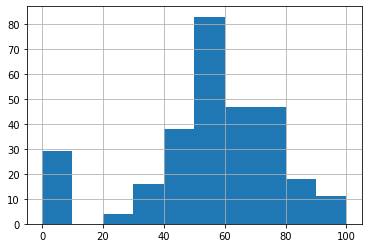

In [164]:
# score
display(pd.DataFrame(db.score.value_counts()).transpose())
db.score.hist()
db.score.describe()

Замечаем, что достаточно много кто получил нулевой бал. Тут можно рассуждать так. Или на все вопросы ответ был неверный, или по какой-то причине была аннуляция результатов. Попробуем в дальнейшем выяснить взаимосвязь с нулевой оценкой.

### Приступим к корреялционному анализу

In [165]:
#sns.pairplot(db, kind = 'reg', corner=True)
db.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.185222,-0.194356,0.084930,0.002377,0.169172,-0.002377,0.031092,0.030008,0.074812,-0.026495,0.119967,-0.152683
Medu,-0.185222,1.000000,0.663943,-0.181077,0.094730,-0.266919,-0.094730,-0.035166,0.008406,0.026791,-0.085536,0.109276,0.207405
Fedu,-0.194356,0.663943,1.000000,-0.186356,0.011607,-0.285752,-0.011607,-0.040538,0.019917,-0.013395,-0.057920,0.018125,0.108690
traveltime,0.084930,-0.181077,-0.186356,1.000000,-0.136653,0.108071,0.136653,-0.036740,0.020112,0.038564,0.012692,-0.013298,-0.091424
studytime,0.002377,0.094730,0.011607,-0.136653,1.000000,-0.123739,-1.000000,0.032962,-0.138856,-0.064896,-0.090663,-0.005280,0.116587
failures,0.169172,-0.266919,-0.285752,0.108071,-0.123739,1.000000,0.123739,-0.011463,0.086179,0.038868,0.097653,0.024701,-0.309381
studytime_granular,-0.002377,-0.094730,-0.011607,0.136653,-1.000000,0.123739,1.000000,-0.032962,0.138856,0.064896,0.090663,0.005280,-0.116587
famrel,0.031092,-0.035166,-0.040538,-0.036740,0.032962,-0.011463,-0.032962,1.000000,0.168323,0.071092,0.107080,-0.072642,0.066761
freetime,0.030008,0.008406,0.019917,0.020112,-0.138856,0.086179,0.138856,0.168323,1.000000,0.271289,0.106402,0.044693,0.055319
goout,0.074812,0.026791,-0.013395,0.038564,-0.064896,0.038868,0.064896,0.071092,0.271289,1.000000,-0.006589,0.076301,-0.125660


Первым делом в глаза попадает чёткая линейная (обратная) зависимость studytime от studytime_granular. Поэтому второй параметр можно не рассматривать и исключить из выборки.

Так можно увидеть некую слабую зависимость между:
- age и Medu, failures, absences, score
- Medu и Fedu, traveltime, failures, absences, score
- Fedu и traveltime, failures
- studytime и score
- failures и health, absences, score
- famrel и freetime, health.
- freetime и goout, health
- goout и health, absences, score
- absences и score
- score и age, Medu, studytime, failures, goout, absences

В такой зависимости наверно есть доля правды, ведь получается вот что. Свободное время хорошо зависит от отношений в семье, от общения с друзьями и от здоровья. В свою очередь здоровье зависит от количества внеучебных неудач. Количество внеучебных неудач зависит от возраста, образования родителей и времени на учёбу помимо школы. Чтобы детальнее разобраться необходимо попарсное сравнение данных признаков. 

In [166]:
db.drop(['studytime_granular'], inplace = True, axis = 1)

Выделим все нечисловые значения в отдельный датасет со значением оценки (score).

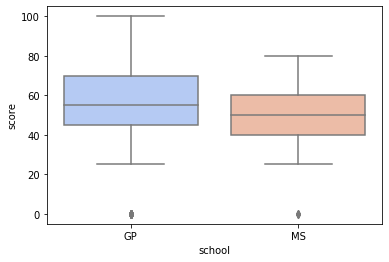

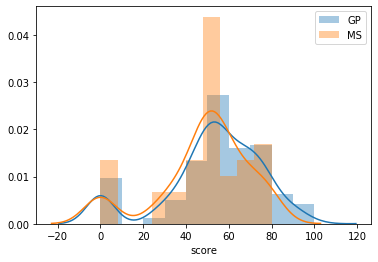

In [167]:
plt.figure();
sns.boxplot(x="school", y="score", data=db, palette="coolwarm");
plt.show();

plt.figure();
sns.distplot(db[db.school == 'GP']['score'], bins=10, label='GP');
sns.distplot(db[db.school == 'MS']['score'], bins=10, label='MS');
plt.legend();
plt.show();

Можно заметить, что данный признак следует оставить, так как заметно, что ученники школы GP, получают больше положительных оценок, так же помним, что выборка у них больше. То есть ученников со школы MS представлены в меньшем кол-ве и там разброс оценок меньше, к тому же крайне мало высоких оценок.

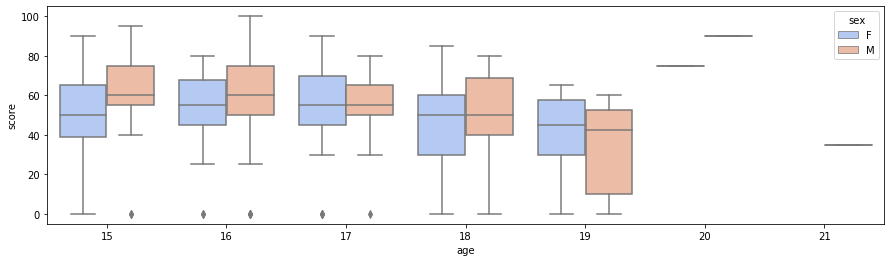

<Figure size 1080x288 with 0 Axes>

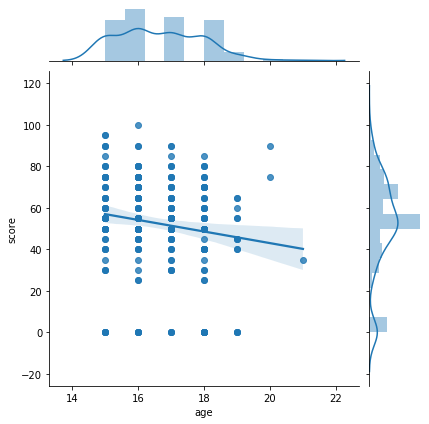

In [194]:
plt.figure(figsize=(15,4));
sns.boxplot(x="age", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

plt.figure();
sns.jointplot(x='age', y='score', data=db, kind='reg');
plt.show();

Возраст следует оставить, достаточно забавная получается картина, если смотреть в разрезе пола. Забавно, что у 18-летних медианное значение одинаково. Ну и в маленьком возрасте у мальчиков больше хороших оценок, чем у девочек. Лично я был уверен, что пол не будет так влиять и что тут всё будет примерно одинаково. Однако если рассматривать второй рисунок, то тут вроде как все есть варианты, вроде как нет влияния. Давайте отфильтруем данные по возрасту, оставим строго меньше 20 лет.

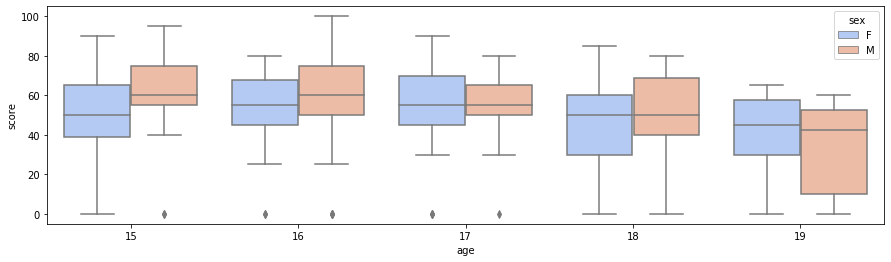

<Figure size 1080x288 with 0 Axes>

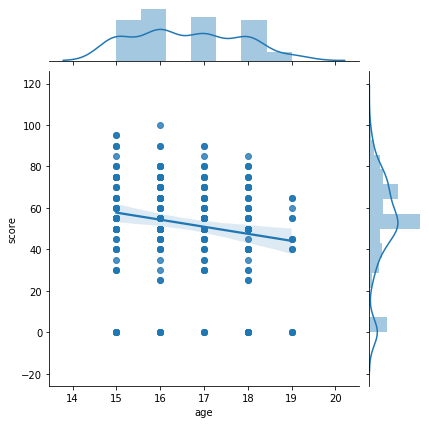

In [195]:
db2 = db.loc[db.age < 20]

plt.figure(figsize=(15,4));
sns.boxplot(x="age", y="score", hue="sex", data=db2, palette="coolwarm");
plt.show();

plt.figure();
sns.jointplot(x='age', y='score', data=db2, kind='reg');
plt.show();

После удаления тех кому старше 20, у нас всё равно остаётся такая же регрессия, получается не зря они не выходили за пределы выбросов. Чем старше, тем хуже результат.

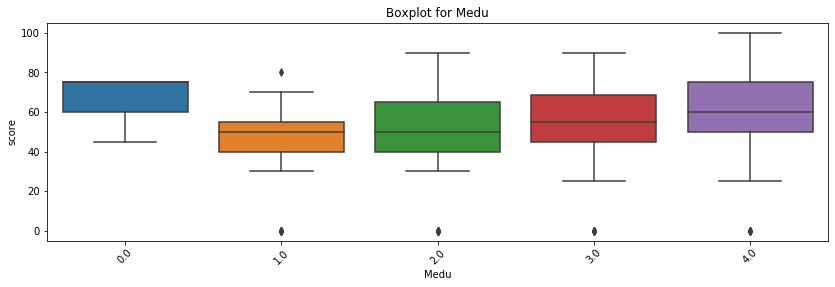

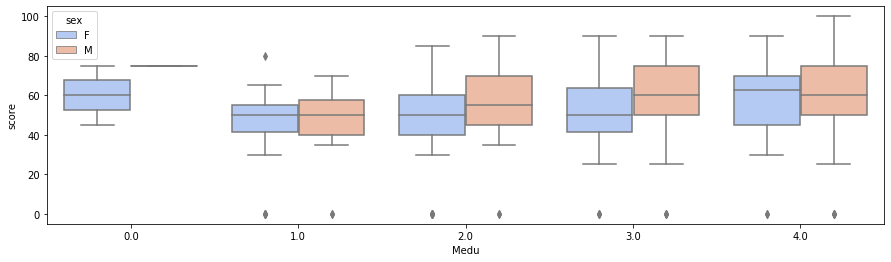

<Figure size 1080x288 with 0 Axes>

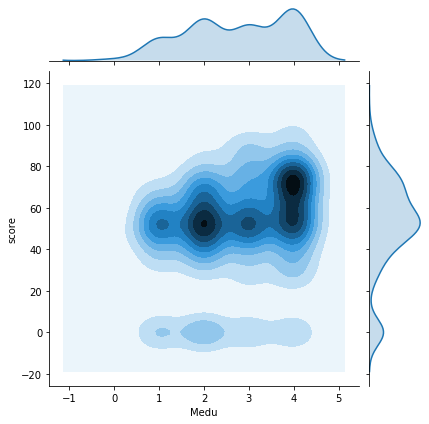

In [196]:
get_boxplot('score','Medu')

plt.figure(figsize=(15,4));
sns.boxplot(x="Medu", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

plt.figure();
sns.jointplot(x='Medu', y='score', data=db, kind='kde');
plt.show();

Данный признак следует оставить, так как видим, что хоть это и категорийнный признак, но всё же тут явная зависимость по отношению к возрастанию этого числа. Что бы они не значили, чем выше число, тем больше совпадений и тем больше хороших оценок. Но мы-то знаем, что цифра 4 означает, что у мамы высшее образование, а маленькое число означает, что высшего образования нет.

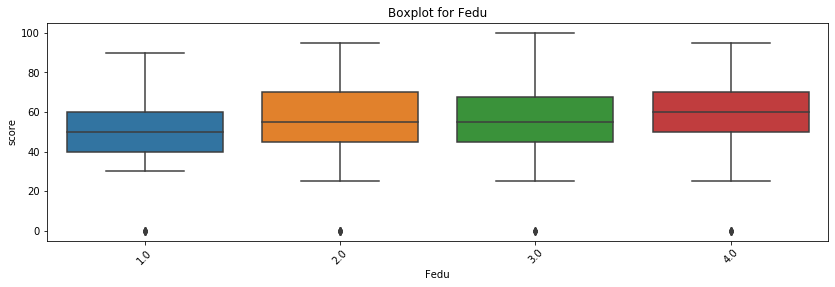

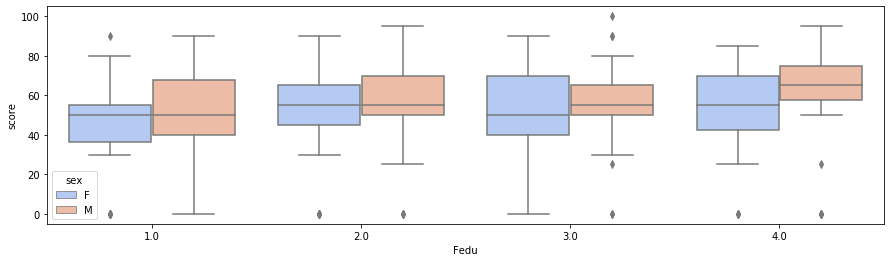

<Figure size 432x288 with 0 Axes>

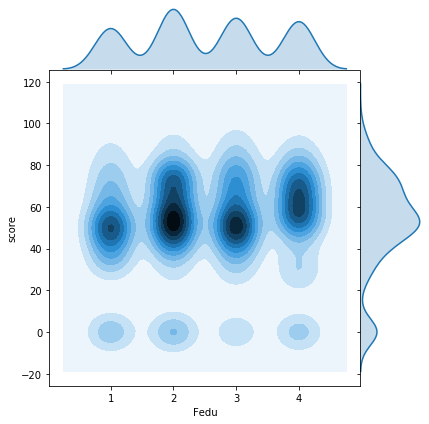

In [199]:
get_boxplot('score','Fedu')

plt.figure(figsize=(15,4));
sns.boxplot(x="Fedu", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

plt.figure();
sns.jointplot(x='Fedu', y='score', data=db, kind='kde', space=0);
plt.show();

Выходит, что данный признак мало связан с результатами оценок по математике, поэтому исключим его из претенденов участия в обучении модели.

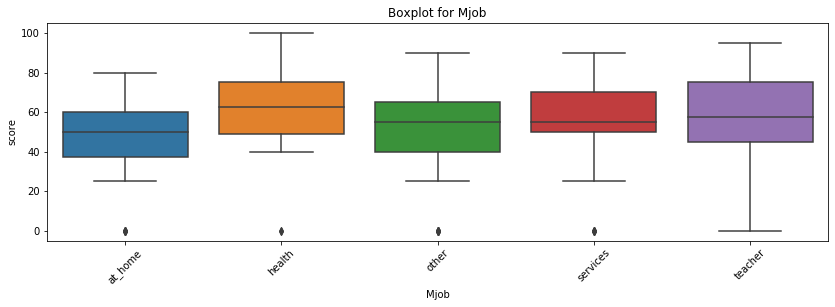

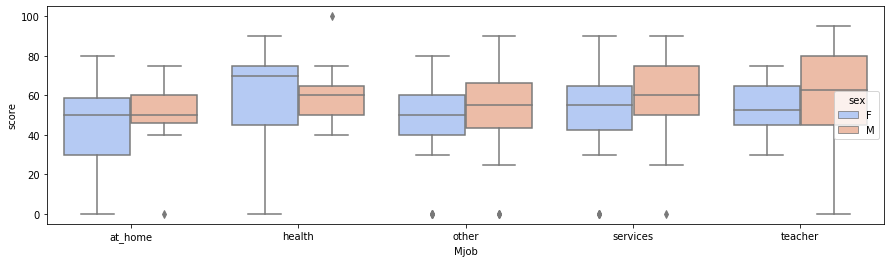

In [200]:
get_boxplot('score','Mjob')

plt.figure(figsize=(15,4));
sns.boxplot(x="Mjob", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

Очевидно, что данный признак оставляем, так как достаточно много разных вариантов получаем, если сравниваем в разрезе пола. У мам, которые работают учителями их сыновья чаше получают плохую оценку, нежели девочки. Делаем вывод, что учителя мамы, с мальчиками не дружат. Посмотрим на профессию папы.

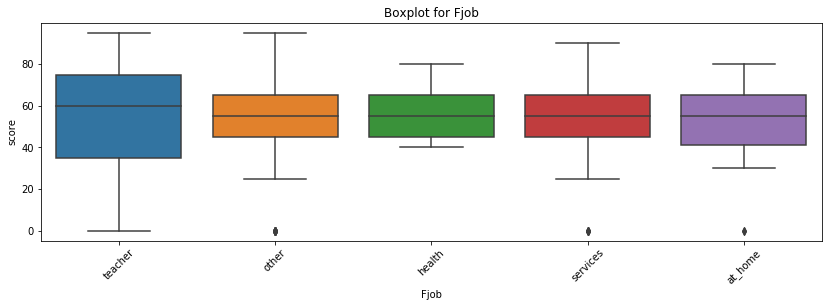

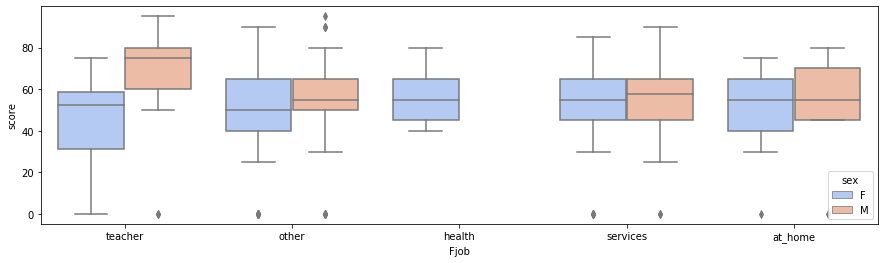

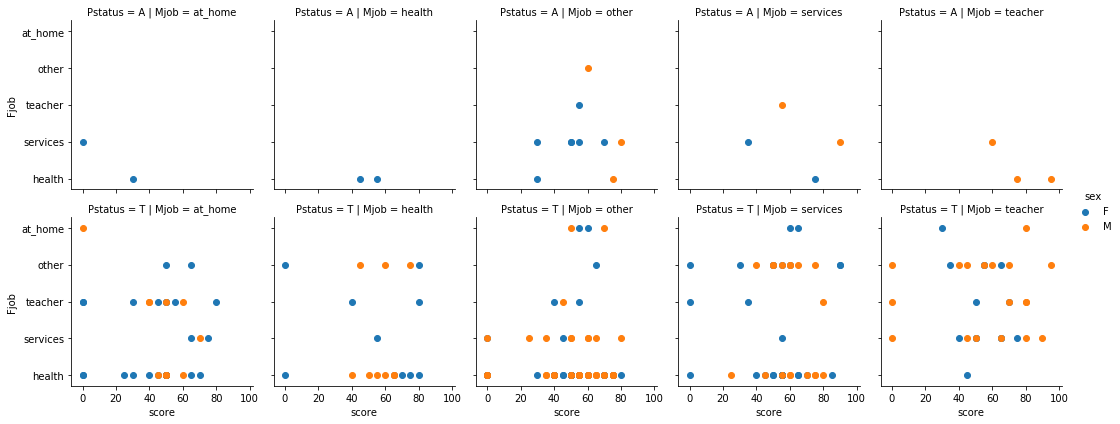

In [201]:
get_boxplot('score','Fjob')

plt.figure(figsize=(15,4));
sns.boxplot(x="Fjob", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

g = sns.FacetGrid(db, col="Mjob", row="Pstatus", hue='sex')
g = g.map(plt.scatter, "score", "Fjob").add_legend();

Ну и очевидно получаем, что отцы учителя не дружат с девочками. Как минимум забавно. Оставить этот признак не можем, потому что медианное значение как правило одинаково.

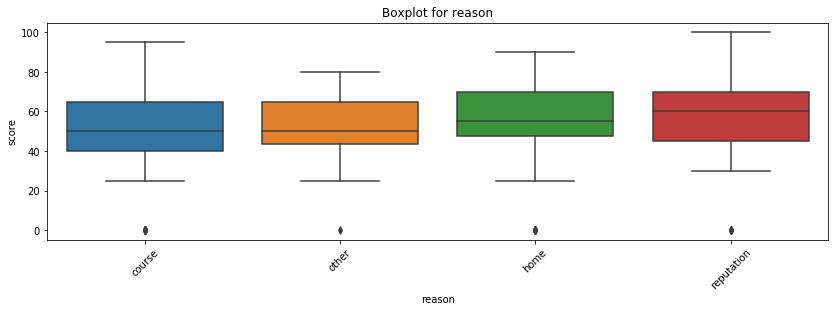

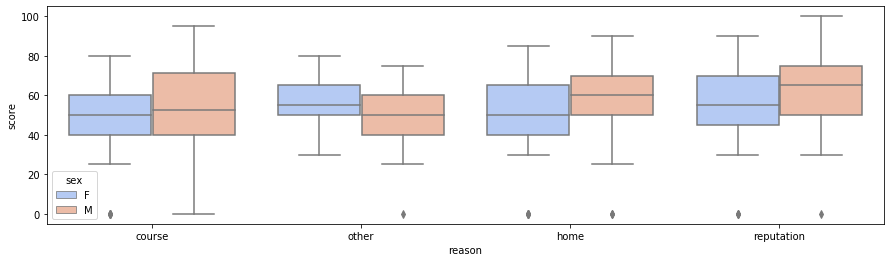

In [193]:
get_boxplot('score','reason')

plt.figure(figsize=(15,4));
sns.boxplot(x="reason", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

Данный признак следует оставить, так как видим, что репутация и школьная программа лучше влияет на высокую оценку.

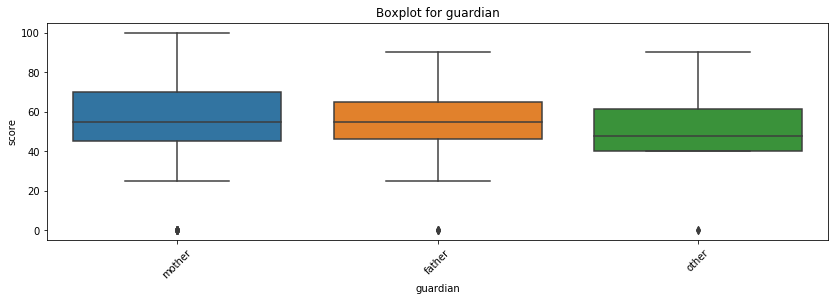

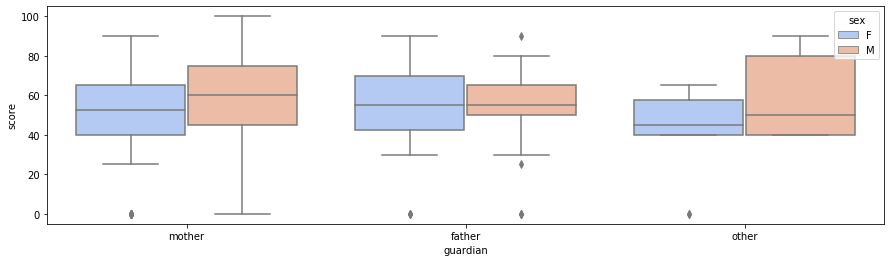

In [202]:
get_boxplot('score','guardian')

plt.figure(figsize=(15,4));
sns.boxplot(x="guardian", y="score", hue="sex", data=db, palette="coolwarm");
plt.show();

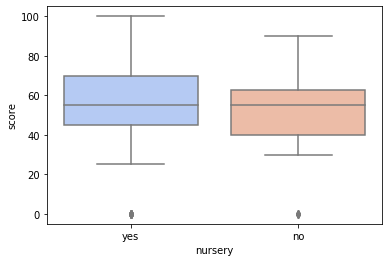

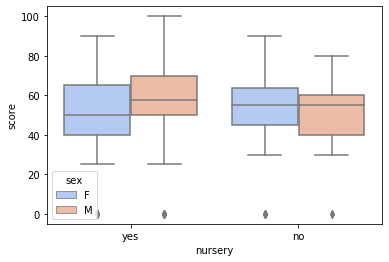

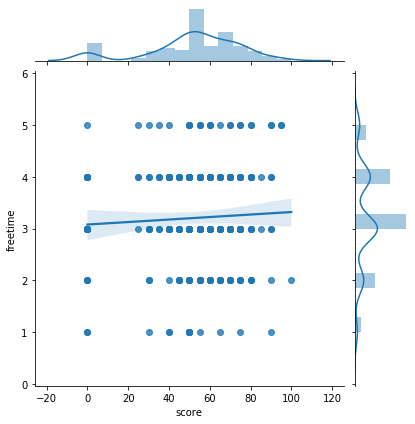

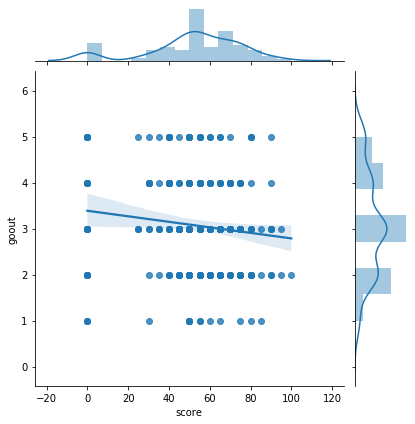

In [172]:
category_db = db[['sex','address','famsize','Pstatus','Mjob','Fjob','reason',
               'guardian','schoolsup','famsup','paid','activities','nursery',
               'higher','internet','romantic','score']]

plt.figure();
sns.boxplot(x="nursery", y="score", data=category_db, palette="coolwarm");
plt.show();

sns.boxplot(x="nursery", y="score", hue="sex", data=category_db, palette="coolwarm");

sns.jointplot(x='score', y='freetime', data=db, kind='reg');
sns.jointplot(x='score', y='goout', data=db, kind='reg');

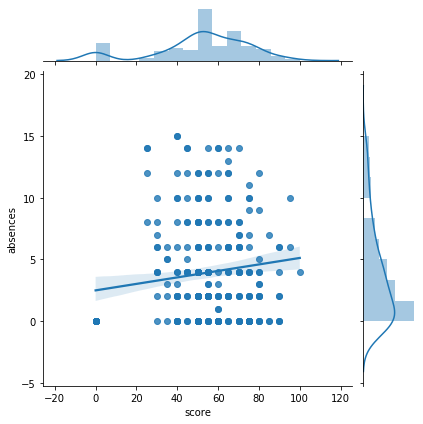

In [173]:

#sns.pairplot(db_sex, hue='sex', palette='Set1');
sns.jointplot(x='score', y='absences', data=db, kind='reg');

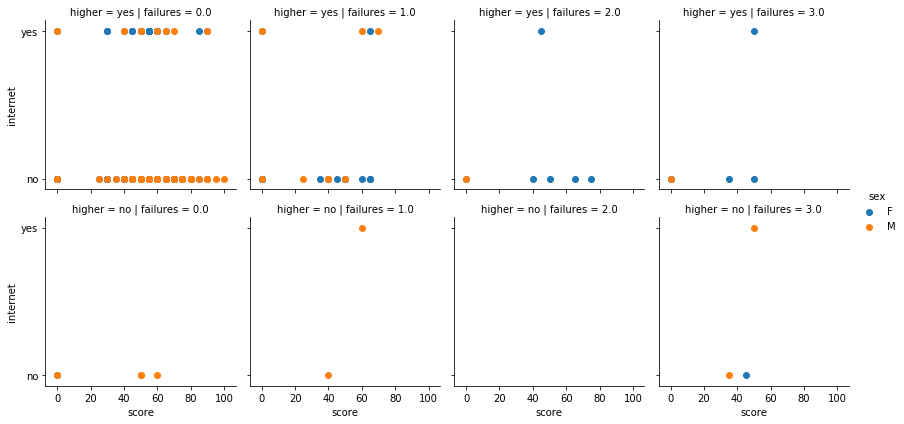

In [174]:
g = sns.FacetGrid(db, col="failures", row="higher", hue='sex')
g = g.map(plt.scatter, "score", "internet").add_legend();

In [46]:
cols = ['sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian']
get_stat_dif_of('score', cols);


Найдены статистически значимые различия для колонки Mjob


In [47]:
cols = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
get_stat_dif_of('score', cols);

Статистически значимые различия НЕ найдены для колонок


В результате анализа данных для последующего построения и обучения модели, следует оставить следующие столбцы:
- school 
- age
- address
- Pstatus
- Medu
- Mjob

По остальным столбцам выявленна слабая связь с оценкой, эти столбцы не следует добавлять в модель:
- sex
- famsize
- Fedu
- Fjob
